#  Import Libraries and Modules

In [96]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define Folder Paths

In [97]:
folder_paths = ['S:\Projects\Capstone Projects\RiceLeaf\Brown spot', 'S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight', 'S:\Projects\Capstone Projects\RiceLeaf\Leaf smut']

# Load and Preprocess Images

In [98]:
images = []
labels = []

desired_width = 224
desired_height = 224

for label, folder_path in enumerate(folder_paths):
  
    folder_name = os.path.basename(folder_path)
    
    for filename in os.listdir(folder_path):
        
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        
        image = image.resize((desired_width, desired_height))

        image = np.array(image)
        
        images.append(image)
        labels.append(label)
 
images = np.array(images)
labels = np.array(labels)


shuffle_indices = np.arange(len(images))
np.random.shuffle(shuffle_indices)
images = images[shuffle_indices]
labels = labels[shuffle_indices]


In [107]:
labels

array([0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 0])

In [ ]:
images

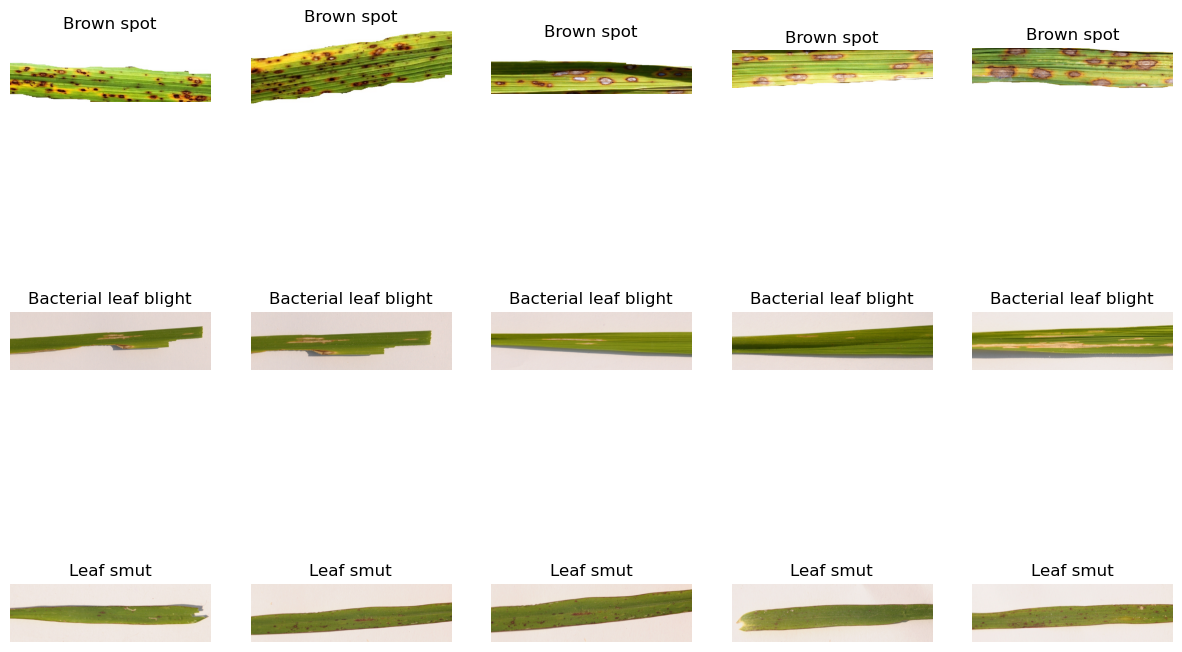

In [109]:
import matplotlib.pyplot as plt

folder_paths = ['S:\Projects\Capstone Projects\RiceLeaf\Brown spot', 'S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight', 'S:\Projects\Capstone Projects\RiceLeaf\Leaf smut']

num_samples_per_class = 5

fig, axes = plt.subplots(len(folder_paths), num_samples_per_class, figsize=(15, 10))

for i, folder_path in enumerate(folder_paths):
    
    folder_name = os.path.basename(folder_path)
   
    image_files = os.listdir(folder_path)[:num_samples_per_class]
    for j, filename in enumerate(image_files):
       
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(folder_name)
        axes[i, j].axis('off')

plt.show()


# Model Preprocessing:

In [99]:
from sklearn.model_selection import train_test_split

# Normalize pixel values
images = images / 255.0

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


# Split Data into Training and Testing Sets:

In [100]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


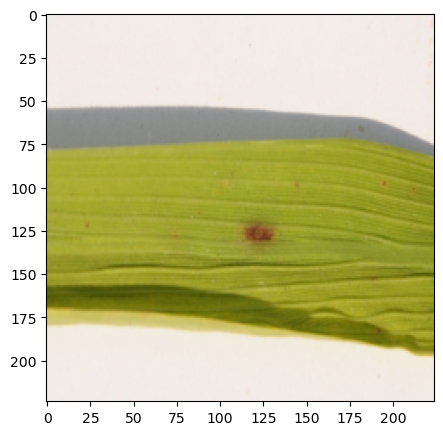

In [111]:
fig = plt.figure(figsize=(5,6))
plt.imshow(x_train[60])

# Exploratory Data Analysis (EDA):

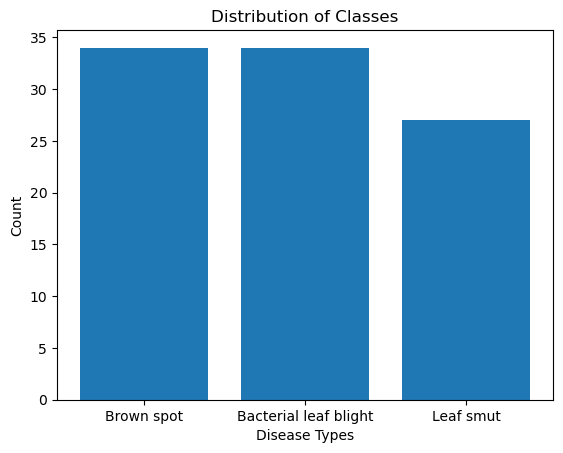

In [101]:
import matplotlib.pyplot as plt

# Count occurrences of each class
unique, counts = np.unique(train_labels, return_counts=True)

# Plot bar chart
plt.bar(unique, counts, tick_label=['Brown spot', 'Bacterial leaf blight', 'Leaf smut'])
plt.xlabel('Disease Types')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


### Model Building

In [57]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(folder_paths), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model checkpoint callback
checkpoint_path = 'S:/Projects/Capstone Projects/RiceLeaf/best_model.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                     monitor='val_accuracy', 
                                     save_best_only=True, 
                                     mode='max', 
                                     verbose=1)


# Train the model with the checkpoint callback and batch size
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback])

# Load the best weights from the checkpoint
model.load_weights(checkpoint_path)


Epoch 1/10


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.3292 - loss: 2.1858
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 914ms/step - accuracy: 0.3259 - loss: 2.3621 - val_accuracy: 0.3333 - val_loss: 1.3435
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.3641 - loss: 1.3682
Epoch 2: val_accuracy did not improve from 0.33333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 618ms/step - accuracy: 0.3625 - loss: 1.3456 - val_accuracy: 0.3333 - val_loss: 1.0646
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.4963 - loss: 1.0583
Epoch 3: val_accuracy improved from 0.33333 to 0.41667, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 797ms/step - accuracy: 0.4828 - loss: 1.0649 - val_accuracy: 0.4167 - val_loss: 1.0663
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.4702 - loss: 1.0559
Epoch 4: val_accuracy did 

In [59]:
# Evaluate the model4 on training set
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model4 on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7266 - loss: 0.6468
Training Accuracy: 75.79%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5833 - loss: 0.8229
Testing Accuracy: 58.33%


### Model 1 has a training accuracy of 75.79% and a testing accuracy of 58.33%.

# Model 2: Now using 30 epochs in model 1

### Model 2 Building

In [60]:
# Define the CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(folder_paths), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Model 2 Training

In [61]:
# Define the model checkpoint callback
checkpoint_path = 'S:/Projects/Capstone Projects/RiceLeaf/best_model2.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                     monitor='val_accuracy', 
                                     save_best_only=True, 
                                     mode='max', 
                                     verbose=1)

# Train the model with data augmentation
history2 = model2.fit(x_train, y_train, 
                    epochs=30, 
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback])

# Load the best weights from the checkpoint
model2.load_weights(checkpoint_path)

Epoch 1/30


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.4475 - loss: 3.4991
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model2.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 871ms/step - accuracy: 0.4330 - loss: 3.7696 - val_accuracy: 0.3750 - val_loss: 1.2788
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.3431 - loss: 1.2636
Epoch 2: val_accuracy did not improve from 0.37500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - accuracy: 0.3389 - loss: 1.2456 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.4842 - loss: 1.0724
Epoch 3: val_accuracy did not improve from 0.37500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step - accuracy: 0.4763 - loss: 1.0712 - val_accuracy: 0.3750 - val_loss: 1.1497
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.3242 - loss: 1.1906
Epoch 4: val_accuracy improved from 0.37500 to 0.41667, saving model to S:/Projects/Capstone Projects/

In [62]:
# Evaluate the model4 on training set
train_loss, train_accuracy = model2.evaluate(x_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model4 on test set
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8720 - loss: 0.3222
Training Accuracy: 91.58%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8750 - loss: 0.4835
Testing Accuracy: 87.50%


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_probs = model2.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Accuracy: 87.50%
Precision: 88.80%
Recall: 87.50%
F1 Score: 87.26%
Confusion Matrix:
[[8 0 1]
 [2 5 0]
 [0 0 8]]


### Model 2 has a training accuracy of 91.58% and a testing accuracy of 87.50%.

# Model 3 : import imagedatagenrator 

### Model 3 Building and training

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

# Add dropout regularization to the model
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(len(folder_paths), activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the model checkpoint callback
checkpoint_path = 'S:/Projects/Capstone Projects/RiceLeaf/best_model3.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                     monitor='val_accuracy', 
                                     save_best_only=True, 
                                     mode='max', 
                                     verbose=1)

# Train the model with data augmentation
history3 = model3.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback])

# Load the best weights from the checkpoint
model3.load_weights(checkpoint_path)


c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.4271 - loss: 3.6639
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model3.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 882ms/step - accuracy: 0.4204 - loss: 3.9254 - val_accuracy: 0.3333 - val_loss: 2.4155
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.2928 - loss: 2.5468
Epoch 2: val_accuracy did not improve from 0.33333
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step - accuracy: 0.2985 - loss: 2.3917 - val_accuracy: 0.2917 - val_loss: 1.1276
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.4147 - loss: 1.0947
Epoch 3: val_accuracy did not improve from 0.33333
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 673ms/step - accuracy: 0.4057 - loss: 1.0958 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.2672 - loss: 1.1045
Epoch 4: val_accuracy improved from 0.33333 to 0.41667, saving model to S:/Projects/Capstone Projects/

In [65]:
# Evaluate the model4 on training set
train_loss, train_accuracy = model3.evaluate(x_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model4 on test set
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5144 - loss: 0.9092
Training Accuracy: 50.53%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.4583 - loss: 0.9787
Testing Accuracy: 45.83%


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_probs = model3.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Accuracy: 45.83%
Precision: 72.20%
Recall: 45.83%
F1 Score: 40.42%
Confusion Matrix:
[[3 6 0]
 [0 7 0]
 [1 6 1]]


### Model 3 has a training accuracy of 50.53% and a testing accuracy of 45.83%.

# Model 4 : Now using 30 epochs in model 3

### Model 4 Building and training

In [67]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(len(folder_paths), activation='softmax')
])

# Compile the model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the model checkpoint callback
checkpoint_path = 'S:/Projects/Capstone Projects/RiceLeaf/best_model4.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                     monitor='val_accuracy', 
                                     save_best_only=True, 
                                     mode='max', 
                                     verbose=1)

# Train the model with data augmentation
history4 = model4.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback])

# Load the best weights from the checkpoint
model4.load_weights(checkpoint_path)

c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30


c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.3485 - loss: 2.5613
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model4.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 945ms/step - accuracy: 0.3508 - loss: 2.6880 - val_accuracy: 0.3333 - val_loss: 1.4838
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.3315 - loss: 1.7168
Epoch 2: val_accuracy improved from 0.33333 to 0.41667, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model4.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 805ms/step - accuracy: 0.3434 - loss: 1.6574 - val_accuracy: 0.4167 - val_loss: 1.0902
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.3643 - loss: 1.0991
Epoch 3: val_accuracy improved from 0.41667 to 0.54167, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model4.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 0.3574 - loss: 1.1018 - val_accuracy: 0.5417 - val_loss: 1.0832
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━

In [68]:
# Evaluate the model4 on training set
train_loss, train_accuracy = model4.evaluate(x_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model4 on test set
test_loss, test_accuracy = model4.evaluate(x_test, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7449 - loss: 0.6758
Training Accuracy: 77.89%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7500 - loss: 0.7219
Testing Accuracy: 75.00%


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_probs = model4.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

print('for model4:')
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
for model4:
Accuracy: 75.00%
Precision: 81.25%
Recall: 75.00%
F1 Score: 73.02%
Confusion Matrix:
[[4 2 3]
 [0 7 0]
 [0 1 7]]


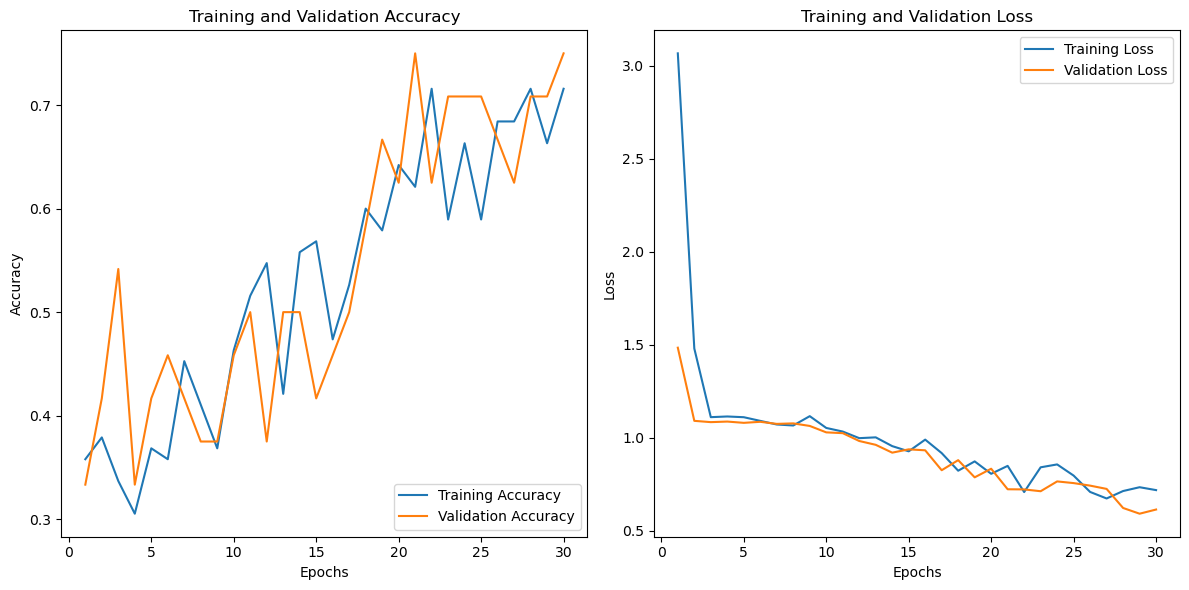

In [70]:

import matplotlib.pyplot as plt

# Extract training history4 from the history2 object
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

### Model 4 has a training accuracy of 77.89% and a testing accuracy of 75.00%.

# Model 5 : model 4 without drop out, 35 epochs

### Model 5 Building and training

In [71]:
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(folder_paths), activation='softmax')
])

# Compile the model
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the model checkpoint callback
checkpoint_path = 'S:/Projects/Capstone Projects/RiceLeaf/best_model5.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                     monitor='val_accuracy', 
                                     save_best_only=True, 
                                     mode='max', 
                                     verbose=1)

# Train the model with data augmentation
history5 = model5.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=35,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback])

# Load the best weights from the checkpoint
model5.load_weights(checkpoint_path)

c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/35


c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.3489 - loss: 3.4144
Epoch 1: val_accuracy improved from -inf to 0.29167, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model5.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 930ms/step - accuracy: 0.3433 - loss: 3.8034 - val_accuracy: 0.2917 - val_loss: 2.2238
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.3571 - loss: 1.5685
Epoch 2: val_accuracy improved from 0.29167 to 0.37500, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model5.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 820ms/step - accuracy: 0.3468 - loss: 1.5500 - val_accuracy: 0.3750 - val_loss: 1.1016
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.2716 - loss: 1.1773
Epoch 3: val_accuracy did not improve from 0.37500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 670ms/step - accuracy: 0.2853 - loss: 1.1675 - val_accuracy: 0.3750 - val_loss: 1.0897
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.3848 - loss: 1.0919
Epoch 4: val_accuracy im

In [72]:
# Evaluate the model4 on training set
train_loss, train_accuracy = model5.evaluate(x_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model4 on test set
test_loss, test_accuracy = model5.evaluate(x_test, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7292 - loss: 0.6326
Training Accuracy: 74.74%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7083 - loss: 0.7742
Testing Accuracy: 70.83%


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_probs = model5.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

print('for model5:')
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


for model5:
Accuracy: 70.83%
Precision: 78.16%
Recall: 70.83%
F1 Score: 69.51%
Confusion Matrix:
[[4 2 3]
 [0 6 1]
 [0 1 7]]


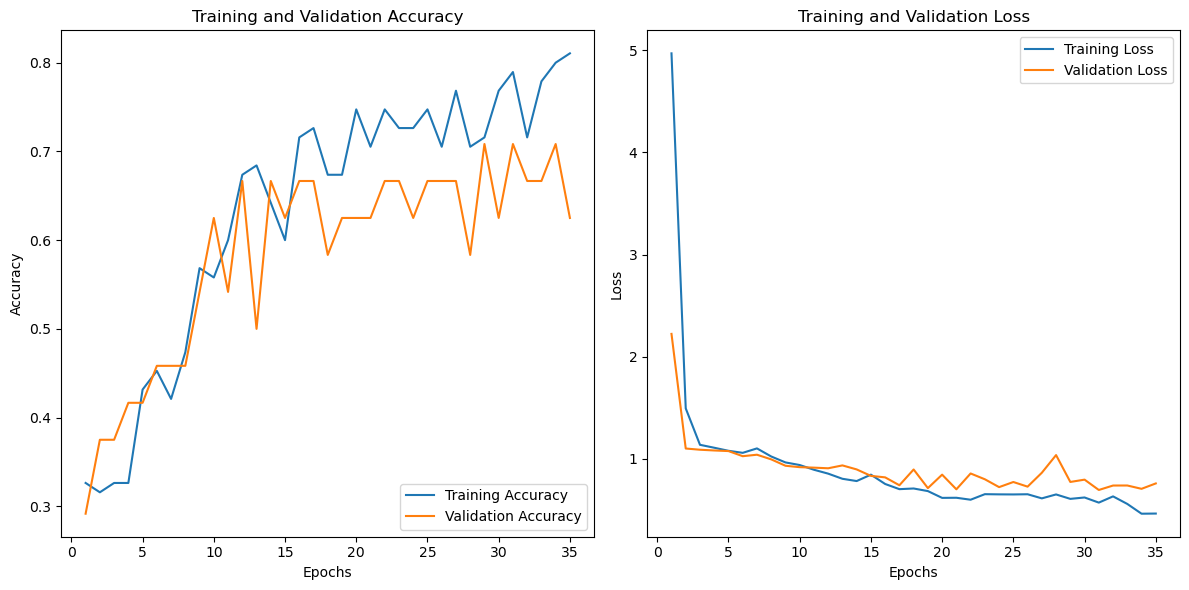

In [74]:

import matplotlib.pyplot as plt

# Extract training history4 from the history2 object
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

### Model 5 has a training accuracy of 74.74% and a testing accuracy of 70.83%.

# Model 6 : model 4 without drop out, 40 epochs

### Model 6 Building

In [102]:
model6 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(folder_paths), activation='softmax')
])

# Compile the model
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.summary()

c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Model 6 Training

In [103]:
# Define the model checkpoint callback
checkpoint_path = 'S:/Projects/Capstone Projects/RiceLeaf/best_model6.keras'
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                     monitor='val_accuracy', 
                                     save_best_only=True, 
                                     mode='max', 
                                     verbose=1)

# Train the model with data augmentation
history6 = model6.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=45,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback])

# Load the best weights from the checkpoint
model6.load_weights(checkpoint_path)

Epoch 1/45


c:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.3751 - loss: 1.5656
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model6.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 894ms/step - accuracy: 0.3787 - loss: 1.6745 - val_accuracy: 0.2500 - val_loss: 1.3840
Epoch 2/45
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.3102 - loss: 1.5464
Epoch 2: val_accuracy improved from 0.25000 to 0.45833, saving model to S:/Projects/Capstone Projects/RiceLeaf/best_model6.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 779ms/step - accuracy: 0.3169 - loss: 1.4967 - val_accuracy: 0.4583 - val_loss: 1.0539
Epoch 3/45
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.4165 - loss: 1.0388
Epoch 3: val_accuracy did not improve from 0.45833
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step - accuracy: 0.4045 - loss: 1.0458 - val_accuracy: 0.3750 - val_loss: 1.1049
Epoch 4/45
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.4548 - loss: 1.0118
Epoch 4: val_accuracy di

In [104]:
# Evaluate the model6 on training set
train_loss, train_accuracy = model6.evaluate(x_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model6 on test set
test_loss, test_accuracy = model6.evaluate(x_test, y_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9083 - loss: 0.2824
Training Accuracy: 89.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9167 - loss: 0.5449
Testing Accuracy: 91.67%


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_probs = model6.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

print('for model6:')
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
for model6:
Accuracy: 91.67%
Precision: 92.86%
Recall: 91.67%
F1 Score: 91.61%
Confusion Matrix:
[[ 5  0  1]
 [ 0  5  1]
 [ 0  0 12]]


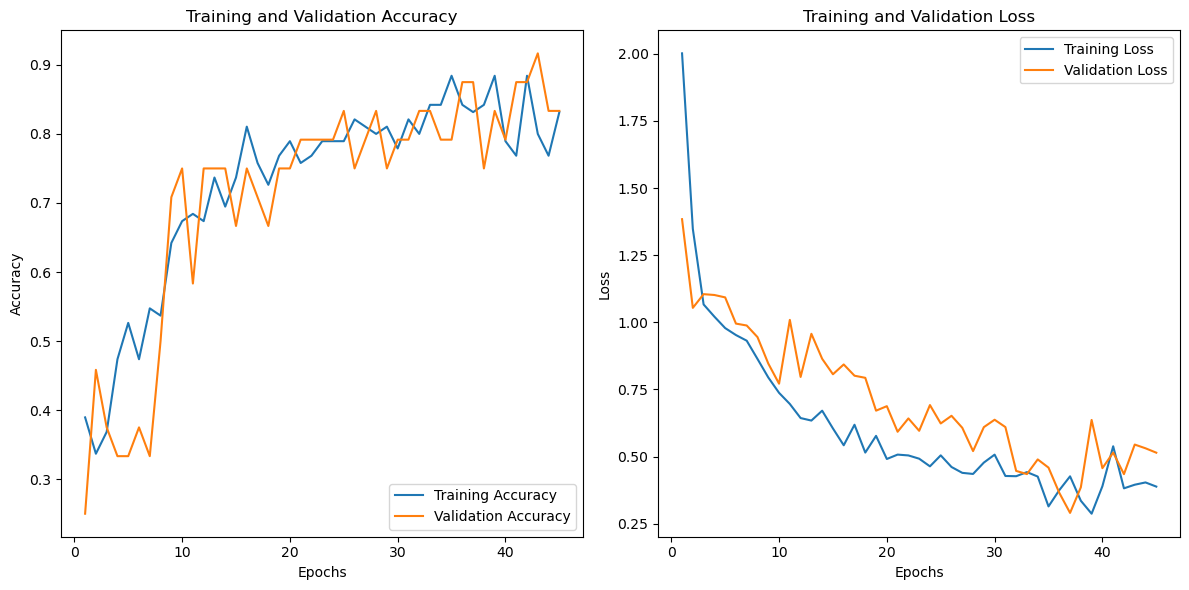

In [106]:

import matplotlib.pyplot as plt

# Extract training history4 from the history2 object
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

### Model 6 has a training accuracy of 89.47% and a testing accuracy of 91.67%.

# We performed six models; the first two models were performed without data augmentation parameters. Then, after 3, 4, 5, and 6, models are performed with data augmentation parameters.